# Задача

Перед нами данные интернет-магазина «Стримчик» за весь период до 2016 года. Нам нужно выявить определяющие успешность игры закономерности, чтобы  сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год

# **Загрузка и знакомство с данными**

Описание полей

Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
from math import factorial
from scipy import stats as st
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Всего в нашей таблице 16715 наблюдений и 11 уникальных признаков

# Предобработка данных

Приведем все названия столбцов в нижний регистр

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропущенные значения в столбцах name и genre совпадают. Большинство признаков у этих 2 наблюдений тоже пропущены. Поэтому их можно удалить

In [9]:
df = df[~df['name'].isna()].reset_index(drop=True)

In [10]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропущенные значение в столбце year_of_release можно заполнить пользуясь названием игры. Также информация о дате выпуска может находиться в других платформах этой игры 

In [11]:
def get_release_year(row):
    name = row['name']
    m = re.search(r'\d+$', name)
    year = 0
    if m is not None:
        if len(m.group())  == 4:
            year = int(m.group())
    if year > 1900 and year <= 2017:
        return year
    
    year = df[df['name'] == name]['year_of_release'].median()
    return year

In [12]:
df.loc[df['year_of_release'].isna(), 'year_of_release'] = df.loc[df['year_of_release'].isna()].apply(get_release_year, axis=1)

In [13]:
df['year_of_release'].unique()

array([2006. , 1985. , 2008. , 2009. , 1996. , 1989. , 1984. , 2005. ,
       1999. , 2007. , 2010. , 2013. , 2004. , 1990. , 1988. , 2002. ,
       2001. , 2011. , 1998. , 2015. , 2012. , 2014. , 1992. , 1997. ,
       1993. , 1994. , 1982. , 2016. , 2003. , 1986. , 2000. , 1995. ,
       1991. , 1981. , 1987. , 1980. , 1983. ,    nan, 2002.5, 2013.5,
       2005.5, 2001.5])

Нужно округлить нецелые значения года

In [14]:
df.loc[~df['year_of_release'].isna(), 'year_of_release'] = df.loc[~df['year_of_release'].isna(), 'year_of_release'].astype('int')

In [15]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.,   nan])

Приведем столбцы к правильному типу данных

In [16]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Проверим почему тип данных в столбце user_score - object.

In [17]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

'tbd' - to be determined, т.е. будет определено. Это данные за 2016 год? 

In [18]:
df[df['user_score']=='tbd']['year_of_release'].unique()

array([2010., 2005., 2011.,   nan, 2009., 2004., 1999., 2001., 2008.,
       2007., 2003., 2000., 2006., 2002., 2015., 2014., 2012., 2013.,
       2016., 1997.])

'tbd' присутствуют почти во всех годах. Тогда будем считать их как пропущенные значения. Изменим тип данных в столбце user_score в числовой тип с помощью pd.to_numeric()

In [19]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [20]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Также проверим на дубликаты

In [21]:
df.duplicated().sum()

0

# Добавление столбца total_sales

In [22]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [23]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# Исследовательский анализ данных

Посмотрим сколько игр выпускалось в разные годы

In [24]:
games_by_year = pd.DataFrame(df.groupby('year_of_release')['name'].nunique()).reset_index().rename(columns={'name':'games_count'})

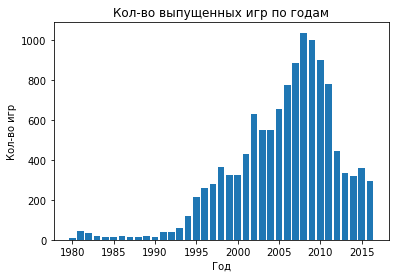

In [25]:
plt.bar(games_by_year['year_of_release'], games_by_year['games_count'])
plt.title('Кол-во выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Кол-во игр')
plt.show()

Бум производства игр произошел начиная с 1995 года

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам

In [26]:
top_platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5).index.to_list()

In [27]:
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS']

PS2 и Xbox 360 лидируют по суммарным продажам в нашей таблице. Посмотрим отдельно на лидеров продаж в 2015 году

In [28]:
top_platforms_2015 = df[df['year_of_release']==2015].groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5).index.to_list()

In [29]:
top_platforms_2015

['PS4', 'XOne', '3DS', 'PS3', 'WiiU']

А в последнее время лидируют PS4 и Xbox One

Построим распределение суммарных продаж по годам для семейства PlayStation

In [30]:
def platfrom_sales_barplot(platform):
    sales_df = pd.DataFrame(df[df['platform']==platform].groupby('year_of_release')['total_sales'].sum()).reset_index()
    plt.bar(sales_df['year_of_release'], sales_df['total_sales'])
    plt.title(f'{platform} Продажи по годам')
    plt.xlabel('Год')
    plt.ylabel('Продажи (млн $)')
    plt.show()

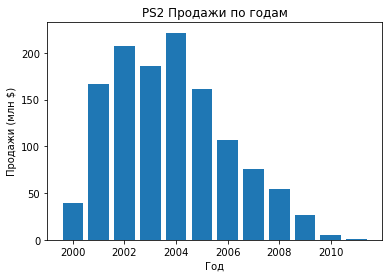

In [31]:
platfrom_sales_barplot('PS2')

Пик продаж произошел в 2001 - 2004 годах. C 2004 года суммарные продажи на платформе PS2 начали падать. PS3 появилась в 2006 году, поэтому люди предпочли подождать выхода новой версии PS. PS2 5 лет поддерживала рост показателей суммарных продаж

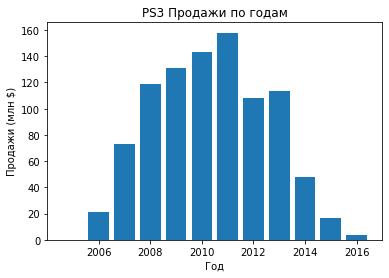

In [32]:
platfrom_sales_barplot('PS3')

Пик продаж произошел в 2008 - 2011 годах. C 2011 года суммарные продажи на платформе PS3 начали падать. PS4 появилась в 2013 году. PS3 6 лет поддерживала рост показателей суммарных продаж

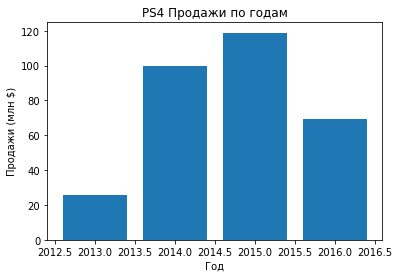

In [33]:
platfrom_sales_barplot('PS4')

PS4 вышел в ноябре 2013 года, поэтому в этом году не очень хорошие продажи. Можно предсказать, что до 2018 года продажи будут продолжать увеличиваться

Построим распределение суммарных продаж по годам для семейства Xbox

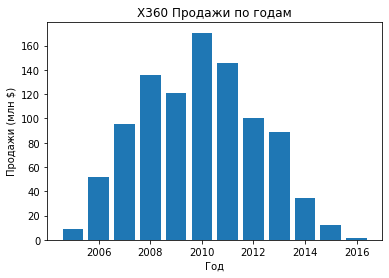

In [34]:
platfrom_sales_barplot('X360')

Пик продаж произошел в 2010 году, после чего продажи стали падать. Xbox One вышел в 2013 году. Xbox360 6 лет поддерживала рост показателей суммарных продаж

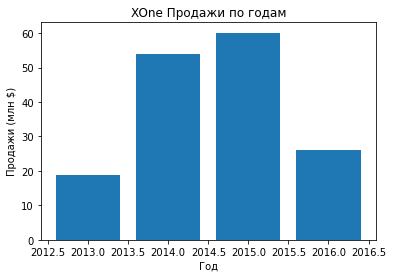

In [35]:
platfrom_sales_barplot('XOne')

График Xbox One очень похож на график PS4. С момента выхода приставки продажи с каждым годом увеличиваются

Также рассмотрим распределение суммарных продаж по годам для семейства Nintendo

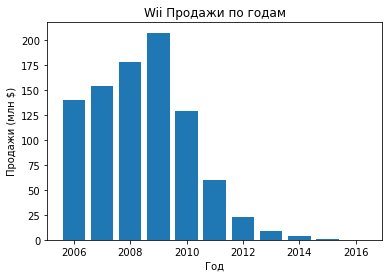

In [36]:
platfrom_sales_barplot('Wii')

C 2009 года продажи стали падать. Пик продаж произошел в том же году. Следующее поколение приставки вышло в 2012 году. Nintendo Wii поддерживала рост продаж 4 года

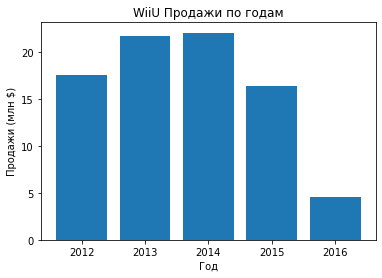

In [37]:
platfrom_sales_barplot('WiiU')

Продажи стали падать начиная с 2014 года. Приставка вышла в 2012 году, продержав всего 3 года положительного тренда продаж

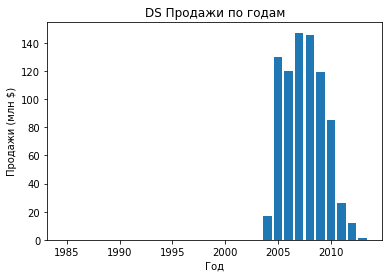

In [38]:
platfrom_sales_barplot('DS')

Nintendo DS вышел в 2004 году. В 2008 году продажи начали падать. В 2014 продаж почти совсем нет

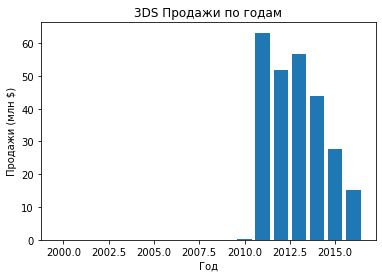

In [39]:
platfrom_sales_barplot('3DS')

Nintendo 3DS вышел в 2011 году, и показатели суммарных продаж почти каждый год падают. 

Дополнительно посмотрим на PC

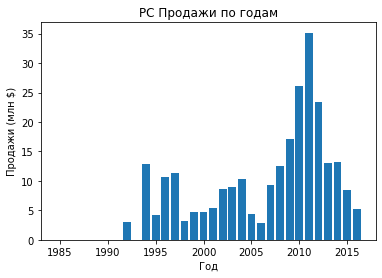

In [40]:
platfrom_sales_barplot('PC')

Самая долговечная платформа. Пик продаж игр произошел в 2011 году

Каждая игровая платформа имеет свой жизненный цикл: она (обычно торжественно) запускается и какое-то время поддерживается компанией-владельцем. Но рано или поздно эта поддержка оканчивается: прекращается производство новых консолей, перестают выходить новые игры для них, и, получается, в какой-то момент какая-то игра становится последней выпущенной на платформе и ставит своеобразную точку. Посмотрев на графики мы приходим к выводу, что каждая популярная игровая платформа держится в течение 5 лет пока не падают ее продажи, и сменяется более новой платформой через еще 2-3 года

# Актуальный период

Оставим в нашей таблице только актуальные данные, чтобы построить прогноз на 2017 год. Изучив предыдущие графики мы увидели, что на 2017 год будут актуальны платформы PS4, Xbox One и Nintendo WiiU. Они начали активную продажу консолей и игр в 2014 году. В том же году "неактуальные" платформы были на самых нижних показателях суммарных продаж

In [41]:
df = df[df['year_of_release']>=2014].sort_values(by=['year_of_release', 'total_sales'], ascending=[True, False]).reset_index(drop=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   float64
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           940 non-null    object 
 11  total_sales      1689 non-null   float64
dtypes: float64(8), object(4)
memory usage: 158.5+ KB


In [43]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [44]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
1,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
2,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
3,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
4,Mario Kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09


Посмотрим какие платформы принесли больше всех денег в актуальный период

In [45]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

PS4 и Xbox One лидируют с большим отрывом от остальных. А продажи PS4 в два раза больше чем Xbox One. Исходя из предыдущих графиков, у обоих продажи растут, у остальных - падают. Поэтому на 2017 год я бы сделал ставку на эти платформы. 3DS тоже можно взять, т.к. она еще живет и делает свою прибыль)

Построим график, на котором будут изображены боксплоты глобальных продаж для каждой отдельной платформы

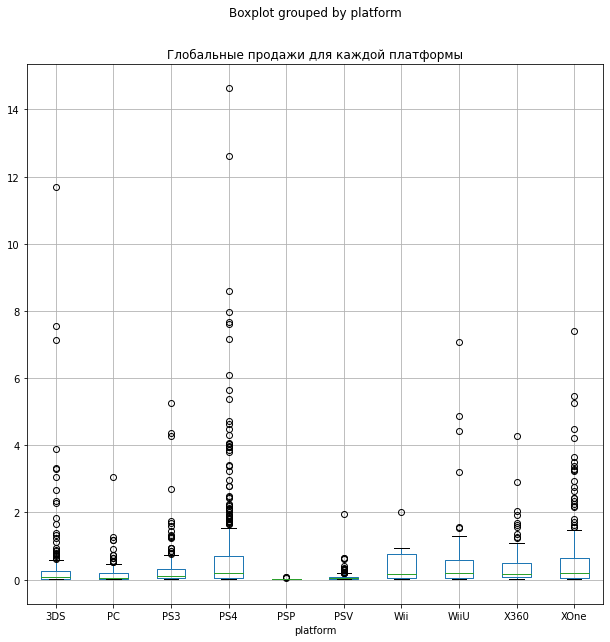

In [46]:
df.boxplot(column='total_sales', by='platform', figsize=(10,10))
plt.title('Глобальные продажи для каждой платформы')
plt.show()

Выбросы показываются в виде кружков. Что это такое в нашей задаче? Это какие-то популярные игры. Я бы даже сказал бестселлеры. И это очень показательная штука. Посмотрите на Nintendo 3DS. Маленький ящик и много выбросов. Это говорит о том, что большАя часть объема продаж делается за счет этих выбросов. В то же время у Xbox One ситуация иная: большой бокс, длинный ус и мало выбросов. Это свидетельствует о том, что на нем покупают самые разные игры, причем, в немалом количестве

In [47]:
def platform_best_games(platform):
    return df[df['platform']==platform].sort_values(by='total_sales', ascending=False).head()

In [48]:
platform_best_games('PS4')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
581,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
0,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
582,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
583,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
2,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [49]:
platform_best_games('XOne')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
584,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
7,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
9,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
587,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
589,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22


Игра Call of Duty: Black Ops 3 принесла PS4 в два раза больше денег, чем Xbox One

In [50]:
platform_best_games('3DS')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
3,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
1188,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN,7.14
19,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,0.68,0.48,2.62,0.11,86.0,8.7,T,3.89
596,Monster Hunter X,3DS,2015,Action,0.27,0.21,2.79,0.05,NaN,NaN,NaN,3.32


А у лидера портативных платформ больше всего денег принесла игра Pokemon Omega Ruby/Pokemon Alpha Sapphire. Его игры очень сильно отличаются от игр PS4 и Xbox One. Да, там в CoD не поиграешь) Зато можешь убивать время в поезде, играя в Марио. Особенно, если ты в Японии

Посмотрим, как влияют на продажи внутри платформы PS4 отзывы пользователей и критиков.

In [51]:
def score_sales_corr(platform):
    return df[df['platform']==platform][['critic_score','user_score','total_sales']].corr()

In [52]:
def user_score_sales_scatter(platform):
    plt.scatter(df[df['platform']==platform]['user_score'], df[df['platform']==platform]['total_sales'])
    plt.title(f'Корреляция между оценкой игроков и суммой продаж ({platform})')
    plt.xlabel('Оценка игроков')
    plt.ylabel('Сумма продаж')
    plt.grid()
    plt.show()

In [53]:
def critic_score_sales_scatter(platform):
    plt.scatter(df[df['platform']==platform]['critic_score'], df[df['platform']==platform]['total_sales'])
    plt.title(f'Корреляция между оценкой критиков и суммой продаж ({platform})')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Сумма продаж')
    plt.grid()
    plt.show()

In [54]:
score_sales_corr('PS4')

,critic_score,user_score,total_sales
critic_score,1.000000,0.546434,0.402661
user_score,0.546434,1.000000,-0.040132
total_sales,0.402661,-0.040132,1.000000


Корреляция между продажами и отзывами пользователей - отрицательная. Посмотрим, почему такое значение на графике

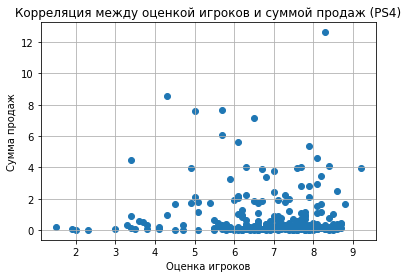

In [55]:
user_score_sales_scatter('PS4')

Крохотная да взаимосвясь присутствует. С увеличением пользовательского рейтинга увеличивается кол-во игр принесших большие деньги. Но есть несколько непредсказуемых значений, у которых маленький рейтинг и сумма продаж достигает 8 млн

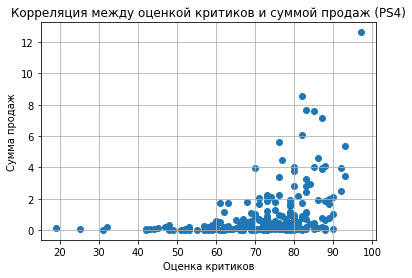

In [56]:
critic_score_sales_scatter('PS4')

Здесь уже хорошо видна взаимосвязь. Значит мнение критиков лучше предсказывает успешность игры

Соотнесем выводы с продажами игр на других платформах

In [57]:
score_sales_corr('XOne')

,critic_score,user_score,total_sales
critic_score,1.000000,0.440977,0.428677
user_score,0.440977,1.000000,-0.070384
total_sales,0.428677,-0.070384,1.000000


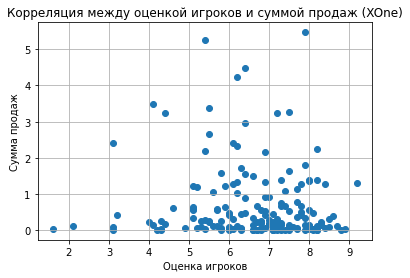

In [58]:
user_score_sales_scatter('XOne')

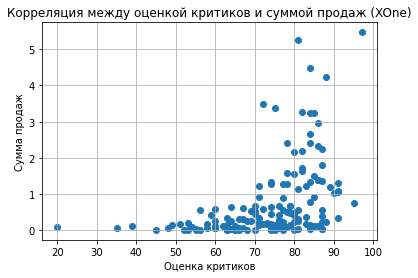

In [59]:
critic_score_sales_scatter('XOne')

В Xbox One такая же взаимосвязь. Здесть тоже мнение критиков лучше предсказывает успешность игры

Обьединим лидеров портативных платформ для расчета корреляции, так как их кол-во невелико

In [60]:
df[(df['platform']=='3DS') | (df['platform']=='WiiU')][['critic_score','user_score','total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.808945,0.347830
user_score,0.808945,1.000000,0.310211
total_sales,0.347830,0.310211,1.000000


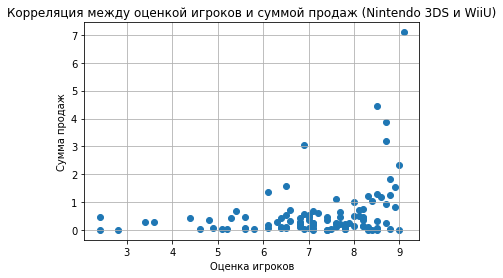

In [61]:
plt.scatter(df[(df['platform']=='3DS') | (df['platform']=='WiiU')]['user_score'], df[(df['platform']=='3DS') | (df['platform']=='WiiU')]['total_sales'])
plt.title('Корреляция между оценкой игроков и суммой продаж (Nintendo 3DS и WiiU)')
plt.xlabel('Оценка игроков')
plt.ylabel('Сумма продаж')
plt.grid()
plt.show()

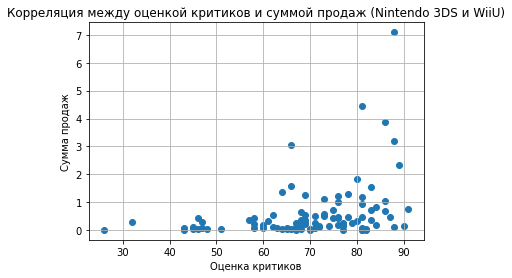

In [62]:
plt.scatter(df[(df['platform']=='3DS') | (df['platform']=='WiiU')]['critic_score'], df[(df['platform']=='3DS') | (df['platform']=='WiiU')]['total_sales'])
plt.title('Корреляция между оценкой критиков и суммой продаж (Nintendo 3DS и WiiU)')
plt.xlabel('Оценка критиков')
plt.ylabel('Сумма продаж')
plt.grid()
plt.show()

В портативных платформах почти одинаковые оценки критиков и игроков. Но взаимосвязь с продажами слабая

Отдельно хочу посмотреть на PC

In [63]:
score_sales_corr('PC')

,critic_score,user_score,total_sales
critic_score,1.000000,0.466099,0.174634
user_score,0.466099,1.000000,-0.071597
total_sales,0.174634,-0.071597,1.000000


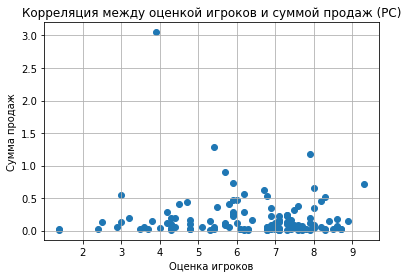

In [64]:
user_score_sales_scatter('PC')

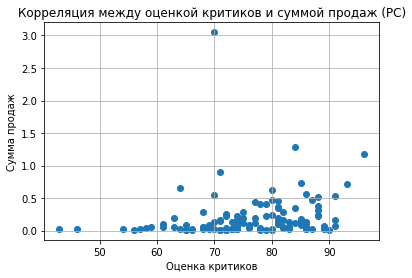

In [65]:
critic_score_sales_scatter('PC')

Графики внешне очень похожи. Есть интересная игра, в которую не поверили, а она выстрелила! Найдем ее 

In [66]:
df[df['platform']=='PC'].sort_values(by='total_sales', ascending=False).head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
24,The Sims 4,PC,2014,Simulation,1.0,1.82,0.0,0.23,70.0,3.9,T,3.05


Вот она игра в которую не верили) 

Посмотрим на общее распределение игр по жанрам

In [67]:
pd.pivot_table(df, index='genre', values='total_sales', aggfunc='count').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,619
Role-Playing,221
Adventure,185
Sports,161
Shooter,128
Misc,113
Racing,69
Fighting,60
Simulation,44


Больше всего игр с жанром Action

In [68]:
pd.pivot_table(df, index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


Больше всех денег принесли жанры Action, Shooter, Sports, Role-Playing. 

In [69]:
pd.pivot_table(df, index='genre', values='total_sales', aggfunc='mean').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Shooter,1.335469
Sports,0.680000
Platform,0.476053
Fighting,0.470333
Role-Playing,0.459005
Racing,0.398841
Misc,0.332301
Action,0.322068
Simulation,0.298409


In [70]:
pd.pivot_table(df, index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


В среднем и по медианному значению Shooter приносит больше всех денег. Значит Action делает продажи за счет большего количества игр и большого количества бестселлеров)

# Портрет пользователя каждого региона

In [71]:
def top_5_by_region(grouping, region):
    return df.groupby(grouping)[region].sum().sort_values(ascending=False).head()

In [72]:
top_5_by_region('platform', 'na_sales')

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

В Северной Америке PS4 и Xbox One приносят больше всех денег

In [73]:
top_5_by_region('platform', 'eu_sales')

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

В Европе лидирует PS4 с большим отрывом от Xbox One

In [74]:
top_5_by_region('platform', 'jp_sales')

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

В Японии больше всех денег приносит Nintendo 3DS и платформы Sony. Не удивительно, ведь обе компании являются японскими

In [75]:
top_5_by_region('genre', 'na_sales')

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

В Северной Америке предпочитают жанры Shooter и Action. Лидирует Shooter

In [76]:
top_5_by_region('genre', 'eu_sales')

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

В Европе тоже предпочитают жанры Action и Shooter. Лидирует Action

In [77]:
top_5_by_region('genre', 'jp_sales')

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

В Японии предпочитают ролевые игры. Наравне с ним стоит Action

In [78]:
df['rating'] = df['rating'].fillna('undef')

In [79]:
top_5_by_region('rating', 'na_sales')

rating
M        96.42
undef    64.72
E        50.74
T        38.95
E10+     33.23
Name: na_sales, dtype: float64

В Северной Америке большинство игр имеют рейтинг для взрослых

In [80]:
top_5_by_region('rating', 'eu_sales')

rating
M        93.44
undef    58.95
E        58.06
T        34.07
E10+     26.16
Name: eu_sales, dtype: float64

В Европе тоже преобладают игры для взрослых

In [81]:
top_5_by_region('rating', 'jp_sales')

rating
undef    56.90
T        14.78
E         8.94
M         8.01
E10+      4.46
Name: jp_sales, dtype: float64

В Японии больше всех денег принесли игры с пропущенным рейтингом. Затем идут игры с рейтингом для подростков.

# Проверка гипотез

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
Альтернативная гипотеза: они отличаются

In [82]:
alpha = 0.05  
results = st.ttest_ind(df[df['platform']=='XOne']['user_score'].dropna(), df[df['platform']=='PC']['user_score'].dropna())
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.10450507919348306
Не получилось отвергнуть нулевую гипотезу


In [83]:
df[df['platform']=='XOne']['user_score'].mean()

6.594545454545456

In [84]:
df[df['platform']=='PC']['user_score'].mean()

6.298360655737705

Значит наша гипотеза оказалась верной - средние пользовательские рейтинги платформ Xbox One и PC одинаковые

## Средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые  
Альтернативная гипотеза: они отличаются

In [85]:
alpha = 0.05  
results = st.ttest_ind(df[df['genre']=='Action']['user_score'].dropna(), df[df['genre']=='Sports']['user_score'].dropna())
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.8711147985107304e-19
Отвергаем нулевую гипотезу


In [86]:
df[df['genre']=='Action']['user_score'].mean()

6.7606060606060545

In [87]:
df[df['genre']=='Sports']['user_score'].mean()

5.2251968503937025

Значит наша гипотеза оказалась верной - средние пользовательские рейтинги жанров Action и Sports разные

# Вывод

Мы провели исследование данных интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. У нас данные до 2016 года и мы должны запланировать кампанию на 2017 год. В ходе исследования мы выяснили актуальный период времени для более точного предсказания 2017 года. Для актуального периода мы выбрали данные с 2014 года и выше. Дальше мы провели исследование уже по этим данным. И пришли к таким выводам:  
1. Лидирующие платформы - PS4 и Xbox One. Для 2017 года нужно сделать ставку на игры этих платформ;  
2. Средний рейтинг критиков лучше предсказывает успешность игры, чем рейтинг пользователей;  
3. Больше всего денег приносят игры с жанрами Action, Shooter, Sports, Role-Playing;  
4. В Северной Америке и Европе отдают предпочтение платформам PS4 и Xbox One, и в основном играют в игры с жанрами Action, Shooter и Sport. В Японии лидирует Nintendo 3DS, PS4 и PSV; японцы предпочитают ролевые игры и Action. Поэтому помимо PS4 и Xbox One нужно еще обратить внимание на игры портативных игровых консолей Nintendo 3DS и Nintendo WiiU. В Северной Америке и Европе лидируют игры с рейтингом для взрослых, а в Японии большинство денег принесли рейтинги с пропущенными значениями, после чего идут игры для подростков и старше;
5. Старые модели игровых консолей сменяются новыми каждые 5-7 лет. Поэтому не стоит долго продавать игры одной платформы. Вспомним пример PSP);  
6. Самая долговечная платформа - PC. Игры на пк приносят не так много денег как на игровых консолях, но их покупают всегда.